In [15]:
import requests
import zipfile
from pathlib import Path
from utils.paths import DATA_RAW_DIR

import json
import codecs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import base64
from IPython.display import display



In [3]:
# Download data from URL

def download_data_from_url(url: str, url_path: Path):
    """
    Download data from a given URL and save it to the specified destination.
    
    Args:
        url (str): The URL to download the data from.
        url_path (Path): The destination path where the downloaded file will be saved.
    """
    if not url_path.exists():
        response = requests.get(url)
        response.raise_for_status()
        with open(url_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded data from {url} to {url_path}")
    else:
        print(f"File already exists at {url_path}, skipping download.")

In [4]:
# Unzip the downloaded file
def unzip_file(zip_path: Path, extract_to: Path):
    """
    Unzip a zip file to the specified directory.

    Args:
        zip_path (Path): The path to the zip file.
        extract_to (Path): The directory where the contents will be extracted.
    """
    extract_to.mkdir(parents=True, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Unzipped {zip_path} to {extract_to}")
    zip_path.unlink() 

In [5]:
url = "https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip"
zip_path = DATA_RAW_DIR / "sign_language.zip"
extract_to = DATA_RAW_DIR / "sign_language"

download_data_from_url(url, zip_path)
unzip_file(zip_path, extract_to)

Downloaded data from https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip to /Users/jssdev/Dev/Learning/Platzi/platzi-neural-networks-tf/data/raw/sign_language.zip
Unzipped /Users/jssdev/Dev/Learning/Platzi/platzi-neural-networks-tf/data/raw/sign_language.zip to /Users/jssdev/Dev/Learning/Platzi/platzi-neural-networks-tf/data/raw/sign_language


In [7]:
def load_json_lines(json_path: Path) -> list[dict]:
    """Load a JSON file with one JSON object per line."""
    data_json = []
    with open(json_path, 'r', encoding='utf-8') as file:
        for line in file:
            data_json.append(json.loads(line.strip()))
    print(f"{len(data_json)} found images.")
    return data_json

In [8]:
def download_image_from_url(url: str, to_grayscale: bool = True) -> np.ndarray:
    """Download an image from a URL and return it as a NumPy array."""
    response = requests.get(url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content))
    if to_grayscale:
        image = image.convert("L")
    return np.array(image)

In [9]:
def load_images_with_labels(data_json: list[dict]) -> list[tuple[np.ndarray, str]]:
    """Download all images from JSON and return them with labels."""
    images = []
    for item in data_json:
        img_array = download_image_from_url(item["content"])
        images.append((img_array, item["label"]))
    return images

In [10]:
def show_image(image: np.ndarray, label: str):
    """Display an image using matplotlib."""
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

9 found images.


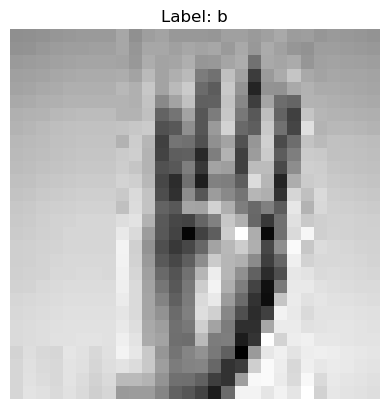

In [11]:
json_path = Path("data/raw/sign_language/sign_mnist_json/data.json")

data_json = load_json_lines(json_path)
images_with_labels = load_images_with_labels(data_json)

# Mostrar una imagen de ejemplo
show_image(images_with_labels[0][0], images_with_labels[0][1])

In [13]:

def load_base64_image_from_json(json_path: Path, key: str = "b") -> Image.Image:
    """
    Load an image encoded in base64 from a JSON file and return it as a PIL Image.
    
    Args:
        json_path (Path): Path to the JSON file.
        key (str): The key in the JSON that holds the base64 string.
        
    Returns:
        PIL.Image: The decoded image.
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    base64_bytes = data[key].encode('utf-8')
    decoded_bytes = base64.b64decode(base64_bytes)
    
    img = Image.open(BytesIO(decoded_bytes))
    return img

In [16]:
json_path = Path("data/raw/sign_language/sign_mnist_base64/data.json")
img = load_base64_image_from_json(json_path)

# Display image
display(img)

In [17]:

def load_sign_mnist_csv(csv_path: Path):
    """
    Load the Sign MNIST dataset from a CSV file.
    
    Returns:
        images (np.ndarray): Array of shape (n_samples, 28, 28)
        labels (np.ndarray): Array of labels
    """
    df = pd.read_csv(csv_path)
    labels = df['label'].values
    df.drop('label', axis=1, inplace=True)
    images = df.values.reshape(-1, 28, 28)
    return images, labels

In [18]:
def plot_image(image: np.ndarray, label: int):
    """
    Show a single image using matplotlib.
    """
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


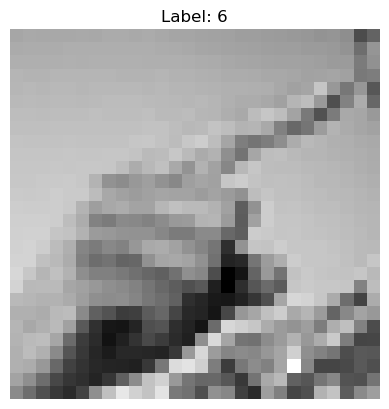

In [19]:
train_csv = Path("data/raw/sign_language/sign_mnist_train/sign_mnist_train.csv")
test_csv = Path("data/raw/sign_language/sign_mnist_test/sign_mnist_test.csv")

train_images, train_labels = load_sign_mnist_csv(train_csv)
test_images, test_labels = load_sign_mnist_csv(test_csv)

plot_image(train_images[1], train_labels[1])